# Peak detection

In [2]:
import numpy, matplotlib.pyplot

spectrum = numpy.loadtxt("../data/co60.dat", dtype=int)
background = numpy.divide(numpy.loadtxt("../data/background.dat", dtype=int),200)
spectrum_foreground = numpy.subtract(spectrum,background)

## z-scores algorithm

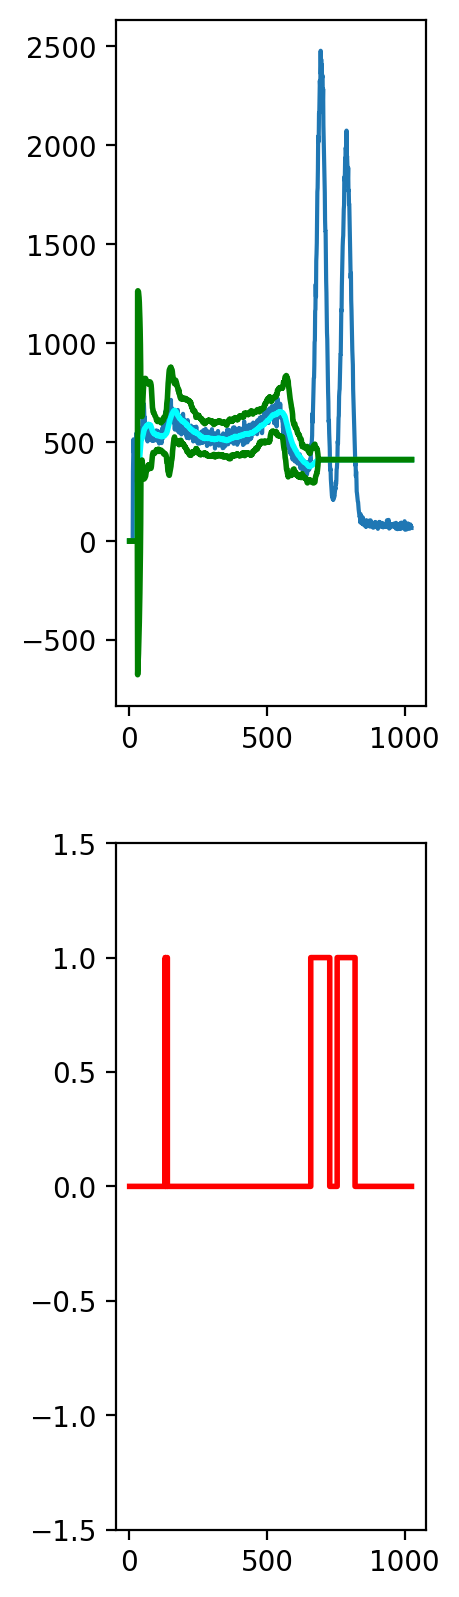

In [28]:
def thresholding_algo(y, threshold, lag=30, influence=0):
    signals = numpy.zeros(len(y))
    filteredY = numpy.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = numpy.mean(y[0:lag])
    stdFilter[lag - 1] = numpy.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = 0 # Only want postive peaks

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = numpy.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = numpy.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = numpy.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = numpy.std(filteredY[(i-lag+1):i+1])

    return dict(signals = numpy.asarray(signals),
                avgFilter = numpy.asarray(avgFilter),
                stdFilter = numpy.asarray(stdFilter))

threshold=4
result = thresholding_algo(spectrum_foreground, threshold)

# Plot result
matplotlib.pyplot.subplot(211)
matplotlib.pyplot.plot(numpy.arange(1, len(spectrum_foreground)+1), spectrum_foreground)
# Rolling average
matplotlib.pyplot.plot(numpy.arange(1, len(spectrum_foreground)+1),result["avgFilter"], color="cyan", lw=2)
# Standard deviation
matplotlib.pyplot.plot(numpy.arange(1, len(spectrum_foreground)+1),result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)
matplotlib.pyplot.plot(numpy.arange(1, len(spectrum_foreground)+1),result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

matplotlib.pyplot.subplot(212)
# Detection
matplotlib.pyplot.step(numpy.arange(1, len(spectrum_foreground)+1), result["signals"], color="red", lw=2)
matplotlib.pyplot.ylim(-1.5, 1.5)
matplotlib.pyplot.rcParams['figure.figsize'] = [2, 10]
matplotlib.pyplot.show()

## SciPy's `find_peaks()`

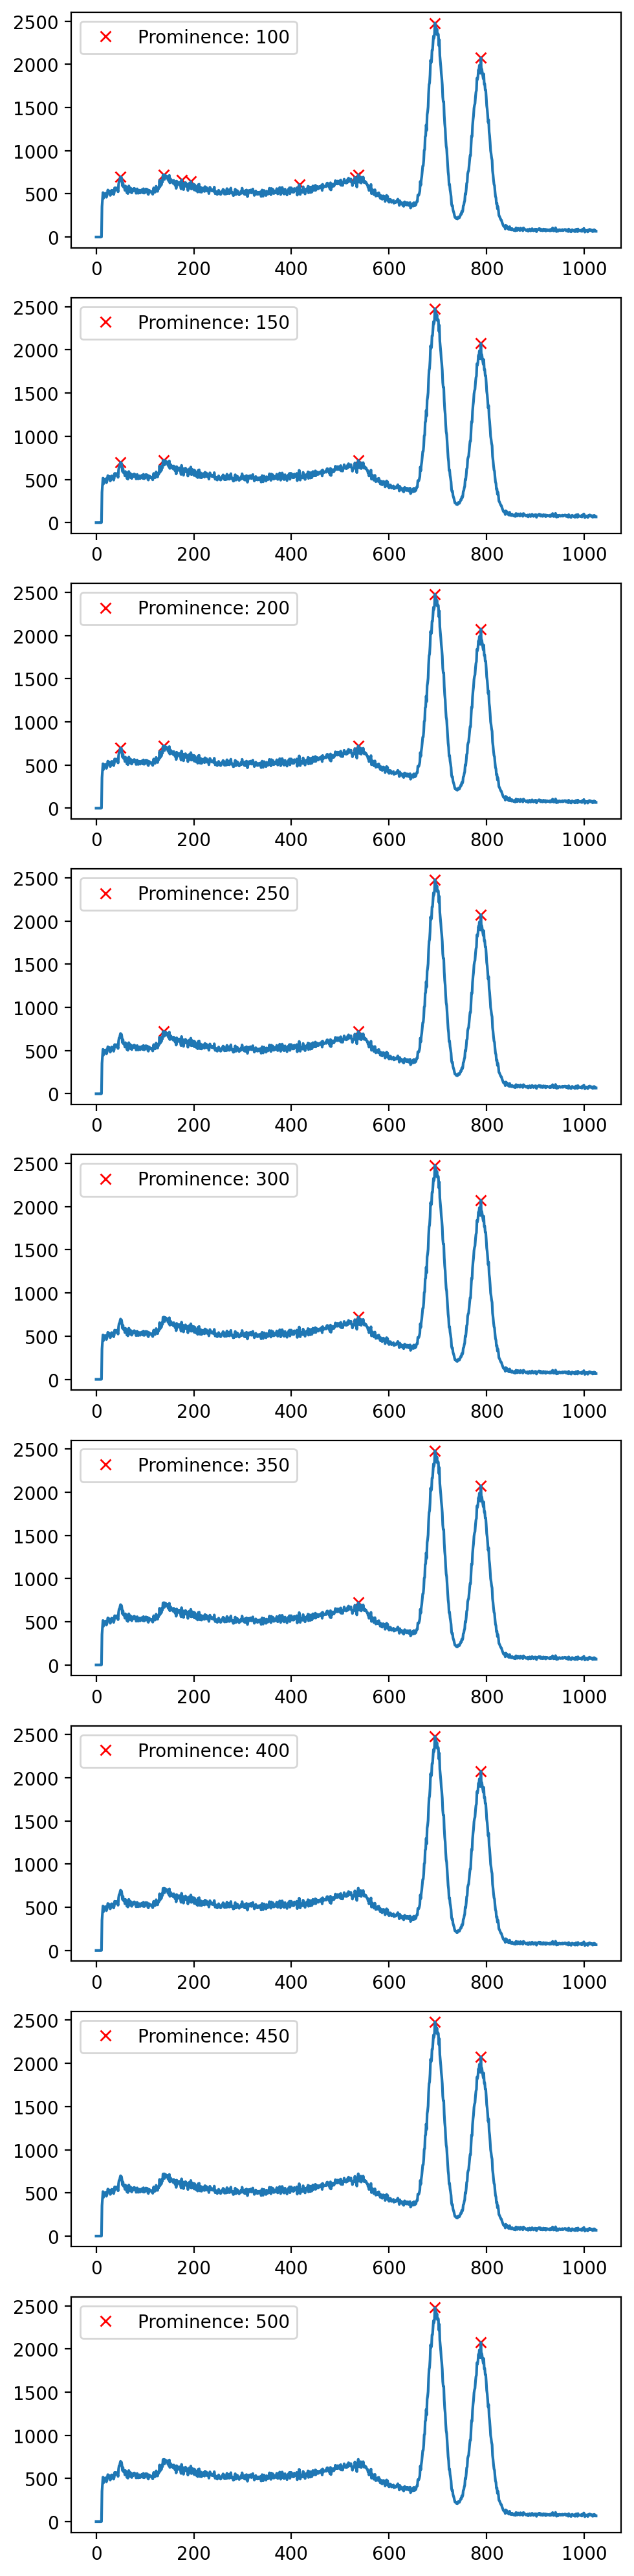

In [30]:
import scipy.signal

for i in range(100,501,50):
    peaks, _ = scipy.signal.find_peaks(spectrum_foreground, prominence=i)
    matplotlib.pyplot.subplot((501-100)//50+1, 1, (i-100)//50+1)
    matplotlib.pyplot.plot(peaks, spectrum_foreground[peaks], "xr")
    matplotlib.pyplot.plot(spectrum_foreground)
    matplotlib.pyplot.legend(['Prominence: {}'.format(i)])

matplotlib.pyplot.rcParams['figure.dpi'] = 200
matplotlib.pyplot.rcParams['figure.figsize'] = [5, 20]
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()